In [21]:
import sys
sys.path.append('/Users/baby/Documents/GitHub/spartan2')

In [2]:
import spartan2.ioutil as ioutil
import spartan2.basicutil as iatutil
import spartan2.drawutil as drawutil

## extracttimes function
extract time stamps in log files or edgelist tensor

groupids: the group col idx used for aggregating timestamps
aggts: dict whose key is an integer(user id) and value is a list of integers(timestamp list)

In [22]:
infile = './inputData/test.reid.gz'
outfile='../output/test.iat.gz'
aggts = ioutil.extracttimes(infile, outfile=outfile, timeidx=0, timeformat='%Y-%m-%d %H:%M:%S', delimeter='\x01',
                        isbyte=True, comments='#', nodetype=str, groupids=[1])

	processing file test.reid.gz


## IAT class

calaggiat function：calculate iat dict **aggiat** (key:user, value: iat list)

caliatcount function：calculate iat count dict **iatcount** (key:iat, value: frequency)

caliatpaircount function：calculate iat dict **iatpaircount** (key:(iat1, iat2), value: frequency)

get_user_iatpair_dict function：calculate iat dict **user_iatpair** (key:user, value: (iat1, iat2) list)

get_iatpair_user_dict function：calculate iat dict **iatpair_user** (key:(iat1, iat2), value: user list)

find_iatpair_user function: find users who have input iat pairs

In [23]:
instance = iatutil.IAT()

In [24]:
# calculate aggiat dict
instance.calaggiat(aggts)

In [25]:
aggiat=instance.aggiat
instance.save_aggiat('../output/testiat.dictlist.gz')
instance.load_aggiat('../output/testiat.dictlist.gz')
aggiat2=instance.aggiat
len(aggiat), len(aggiat2)

(308, 308)

In [26]:
xs, ys = instance.getiatpairs()
len(xs), len(ys)

(160, 160)

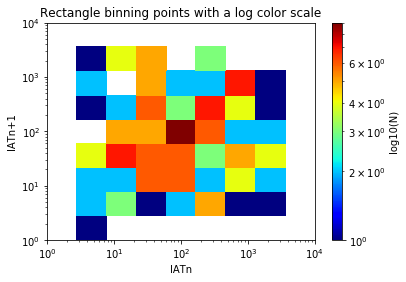

In [27]:
## invoke drawRectbin function
drawutil.drawRectbin(xs, ys, gridsize=5, xlabel='IATn', ylabel='IATn+1')

## class RectHistogram
draw function: draw 2D histogram with rectangular bin

find_peak_rects function: find the bin with the largest number of samples in the range of
horizontal axis: [x-radius, x+radius]
vertical axis: [y-radius, y+radius]
    
return: (x,y) pairs in the bin that has the largest number of samples 

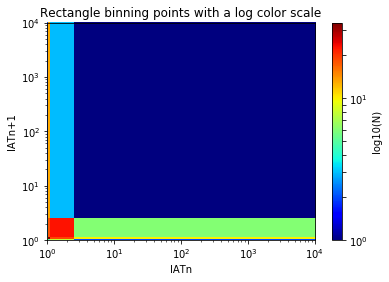

In [14]:
hist = drawutil.drawRectbin(xs, ys, gridsize=10, xlabel='IATn', ylabel='IATn+1')